In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

#import pandas to import csv file
import pandas as pd

from numpy.random import RandomState

In [2]:
f1=pd.read_csv(r'C:\Users\HP-PC\Desktop\GUC\Semester 10\Machine Learning\Assignments\PracticalAssig\house_data_complete.csv')

f1=f1.dropna()

f1=f1.drop(['id','date','zipcode', 'lat','long' ], axis=1)

In [3]:
data_complete=f1.values
xx_complete=data_complete[:,1:]
yy_complete=f1['price']


train = f1.sample(frac=0.6, random_state=RandomState())
nontrain = f1.loc[~f1.index.isin(train.index)]
test= nontrain.sample(frac=0.5, random_state=RandomState())
cv= nontrain.loc[~nontrain.index.isin(test.index)]


train=train.values
test=test.values
cv=cv.values

x_train=train[:,1:]
y_train=train[:,0]

x_test=test[:,1:]
y_test=test[:,0]

x_cv=cv[:,1:]
y_cv=cv[:,0]





In [4]:
def  featureNormalize(X):
    # You need to set these values correctly
    X_norm = X.copy()
    mm=X.shape[0]
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    # =========================== YOUR CODE HERE =====================
    for i in range(0,X.shape[1]):
        mu[i]=np.mean(X[:,i])
        sigma[i]=np.std(X[:,i])
    
    X_norm=(X_norm-mu)/sigma
    X_norm=np.concatenate([np.ones((mm, 1)), X_norm], axis=1)
    # ================================================================
    return X_norm, mu, sigma

In [5]:
#Hypothesis1
xx_training1,mu_training1,sigma_training1=featureNormalize(x_train)
xx_cv1,mu_cv1,sigma_cv1=featureNormalize(x_cv)
xx_test1,mu_test1,sigma_test1=featureNormalize(x_test)
theta1=np.ones(xx_training1.shape[1], dtype=int)

#Hpothesis2
xx_training2,mu_training2,sigma_training2=featureNormalize(np.power(x_train,2))
xx_cv2,mu_cv2,sigma_cv2=featureNormalize(np.power(x_cv,2))
xx_test2,mu_test2,sigma_test2=featureNormalize(np.power(x_test,2))

#Hypothesis3
xx_training3=np.concatenate((x_train,np.power(x_train,2)),axis=1)
xx_training3,mu_training3,sigma_training3=featureNormalize(xx_training3)

xx_cv3=np.concatenate((x_cv,np.power(x_cv,2)),axis=1)
xx_cv3,mu_cv3,sigma_cv3=featureNormalize(xx_cv3)

xx_test3=np.concatenate((x_test,np.power(x_test,2)),axis=1)
xx_test3,mu_test3,sigma_test3=featureNormalize(xx_test3)
theta3=np.ones(xx_training3.shape[1], dtype=int)


#X for each hypothesis
xh1=np.array([xx_training1, xx_cv1, xx_test1])
xh2=np.array([xx_training2, xx_cv2, xx_test2])
xh3=np.array([xx_training3, xx_cv3, xx_test3])

yy=np.array([y_train,y_cv,y_test])


In [6]:
def computeCostMulti(X, y, theta,lmbda):
    J = 0
    h= []
    m=y.size
    for i in range(0,m):
        h.append(np.dot(theta.T,X[i]))
        #print(h)
        J=J+(h[i]-y[i])**2
            
    J=np.divide(J,2*m) + np.dot((lmbda/2*m),sum(np.power(theta,2)))
    
    return J

In [7]:
def gradientDescentMulti(X, y, theta, alpha, num_iters,lmbda):
   
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        sumofh0x=np.dot(X,theta)
        #theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        
        
        theta=theta*(1-alpha*lmbda/m)-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta,lmbda))
    
    return theta, J_history


In [8]:
lmbdaarray=np.array([0,1.5 ,4.5,7, 10,15,20])

def Project(x,y,theta,alpha,iterations):
    x_training=x[0]
    x_cv=x[1]
    x_test=x[2]
    
    y_training=y[0]
    y_cv=y[1]
    y_test=y[2]
        
    J_cv=np.zeros(lmbdaarray.shape[0])
    t1=np.zeros((lmbdaarray.shape[0],theta.size))
    J_history1=np.zeros((lmbdaarray.shape[0],iterations))


    for i in range(lmbdaarray.shape[0]):
        t1[i,:],J_history1[i,:]=gradientDescentMulti(x_training,y_training,theta,alpha,iterations,lmbdaarray[i])
        print(t1)
        J_cv[i]=computeCostMulti(x_cv,y_cv,t1[i],0)

    pyplot.figure()
    pyplot.plot(np.arange(len(J_history1[np.argmin(J_cv)])),J_history1[np.argmin(J_cv)], lw=2)
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J')
    
    lmbdaofminJ=lmbdaarray[np.argmin(J_cv)]

    price1test=np.dot(t1[np.argmin(J_cv)],x_test.T)
    Error_test1=(1/(2*y_test.size))*np.sum(np.power((price1test-y_test),2))
    print("Error=", Error_test1)
    
    return J_cv,lmbdaofminJ,Error_test1, J_history1


[[514059.5808653  -24183.29730188  32832.21246783  71621.87143239
    -515.04750011  14771.1777708   48315.59578879  45201.8019188
   20688.03421497 104958.15301653  59817.45544957  36208.68419371
  -75782.2231095   13071.20098976  40663.27889253 -11839.17703239]
 [     0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.    

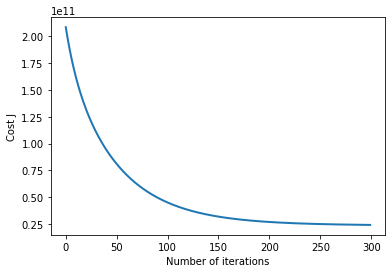

In [9]:
alpha1=0.01
iterations1=300
JJ_CV1,lmin1,err1,J_his1=Project(xh1,yy,theta1,alpha1,iterations1)

print(JJ_CV1)
print(lmin1)

[[514059.5808653   -7160.96027292  43775.02915758  73846.57795894
    2086.65933356  18476.55615445  41478.68030247  42973.11225718
   23841.26317241 105044.79111282  47834.94524003  30981.60719249
  -71075.34053983  14376.51292064  40305.23130306  -7697.8812502 ]
 [     0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.   

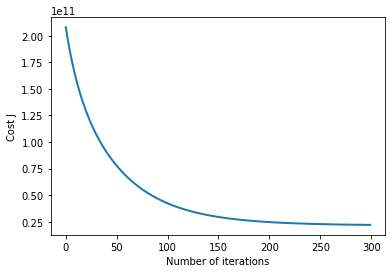

In [10]:
alpha2=0.01
iterations2=300
JJ_CV2,lmin2,err2,J_his2=Project(xh2,yy,theta1,alpha2,iterations2)
print(JJ_CV2)
print(lmin2)

[[ 5.14059581e+05 -2.17918863e+04  7.33918411e+03  1.93910064e+04
  -6.22712609e+03  6.35125119e+03  2.30216125e+04  1.85474966e+04
   9.02273523e+03  5.76231649e+04  1.27624673e+04  1.62926470e+04
  -4.47588387e+04  4.12771563e+03  1.08670840e+04 -1.33527246e+04
   3.69319533e+02  3.50409631e+04  5.84750625e+04  6.78999892e+03
   1.28535742e+04  2.30216125e+04  1.98325428e+04  1.01267377e+04
   6.86558538e+04  3.86678233e+04  1.73256089e+04 -4.43753683e+04
   4.35393797e+03  2.07412210e+04  2.11558772e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.0000

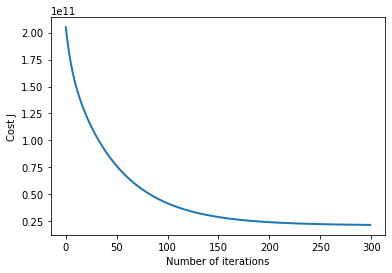

In [11]:
alpha3=0.01
iterations3=300
JJ_CV3,lmin3,err3,J_his3=Project(xh3,yy,theta3,alpha3,iterations3)
print(JJ_CV3)
print(lmin3)

In [12]:
print(J_his1)
print(J_his2)
print(J_his3)

[[2.08273157e+11 2.02412039e+11 1.96876751e+11 ... 2.43349211e+10
  2.43242560e+10 2.43137622e+10]
 [8.22349765e+11 2.58641382e+12 5.40746126e+12 ... 2.90802462e+15
  2.91113724e+15 2.91422286e+15]
 [2.05050298e+12 7.35440057e+12 1.58285572e+13 ... 8.72071985e+15
  8.73004936e+15 8.73929789e+15]
 ...
 [4.30211719e+12 1.60956515e+13 3.49336470e+13 ... 1.93658917e+16
  1.93865897e+16 1.94071080e+16]
 [6.34903919e+12 2.40421778e+13 5.23016263e+13 ... 2.90304931e+16
  2.90614937e+16 2.90922249e+16]
 [8.39596117e+12 3.19886420e+13 6.96693352e+13 ... 3.86828945e+16
  3.87241667e+16 3.87650800e+16]]
[[2.08089252e+11 2.02042594e+11 1.96322334e+11 ... 2.20092031e+10
  2.19989810e+10 2.19889223e+10]
 [8.39981518e+11 2.65780765e+12 5.56887858e+12 ... 2.88583031e+15
  2.88884587e+15 2.89183502e+15]
 [2.10376605e+12 7.56932046e+12 1.63139158e+13 ... 8.65420063e+15
  8.66323921e+15 8.67219860e+15]
 ...
 [4.42070434e+12 1.65737007e+13 3.60128900e+13 ... 1.92183143e+16
  1.92383670e+16 1.92582438e+16]

Text(0, 0.5, 'Cost J')

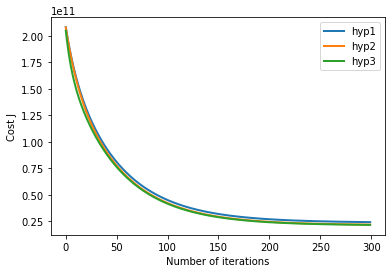

In [13]:
pyplot.figure()
pyplot.plot(np.arange(len(J_his1[0])),J_his1[0], lw=2)
pyplot.plot(np.arange(len(J_his2[0])),J_his2[0], lw=2)
pyplot.plot(np.arange(len(J_his3[0])),J_his3[0], lw=2)
pyplot.legend(['hyp1','hyp2','hyp3'])
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

In [15]:
print('Error of hypothesis 1=',err1)
print('Error of hypothesis 2=',err2)
print('Error of hyppthesis 3=',err3)

Error of hyp1= 23729313377.614532
Error of hyp1= 22650520346.742897
Error of hyp1= 21842930646.49152
